In [1]:
import matplotlib.pyplot as plt
import numpy as np

Desarrollar la tabla de datos

In [2]:
x=np.linspace(8,5,11)

La siguietne linea muestra los estilos por default

In [4]:
#muestras todfos los estilos por default
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


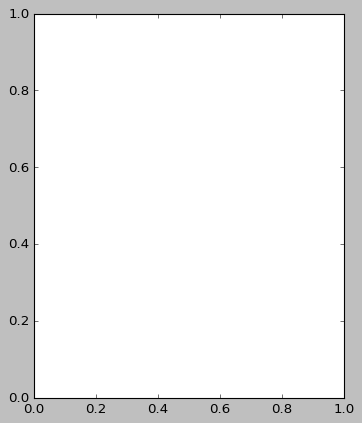

In [18]:
plt.style.use('classic')
fig, ax=plt.subplots(figsize=(5,6))

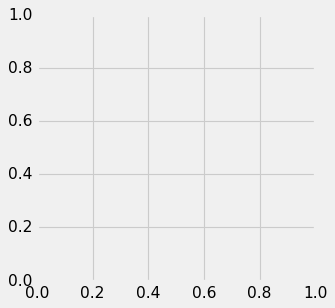

In [17]:
plt.style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(4,4))

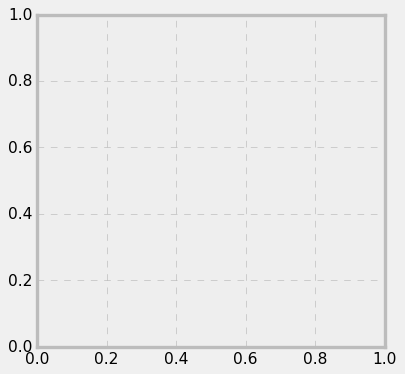

In [15]:
plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(5,5))

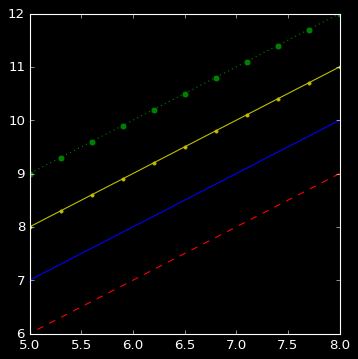

In [27]:
plt.style.use('dark_background')
fig, ax=plt.subplots(figsize=(5,5))
ax.plot(x,x+1,'r--') #-- linea puteada 
ax.plot(x,x+2,'b-') #- linea continua
ax.plot(x,x+3,'y.-') #.- linea y punto
ax.plot(x,x+4,'go:') #: linea discontinua
plt.show()

Ejemplos

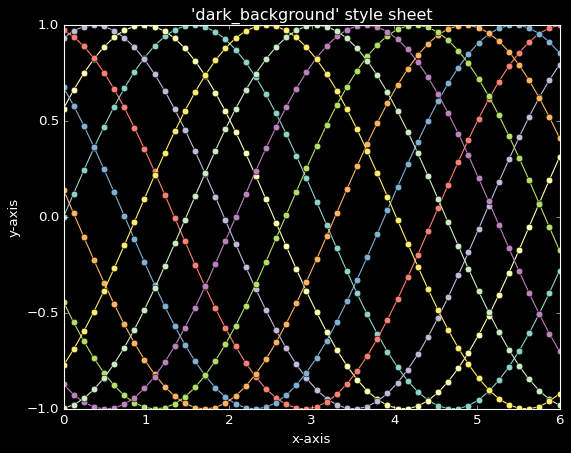

In [28]:
plt.style.use('dark_background')

fig, ax = plt.subplots()

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax.plot(x, np.sin(x + s), 'o-')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("'dark_background' style sheet")

plt.show() 

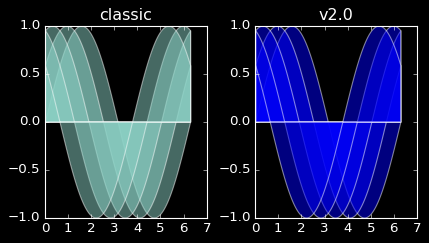

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.3)
th = np.linspace(0, 2*np.pi, 128)
N = 5

def demo(ax, extra_kwargs, title):
    ax.set_title(title)
    return [ax.fill_between(th, np.sin((j / N) * np.pi + th), alpha=.5, **extra_kwargs)
            for j in range(N)]

demo(ax1, {'facecolor': 'C0'}, 'classic')
demo(ax2, {}, 'v2.0')
plt.show()

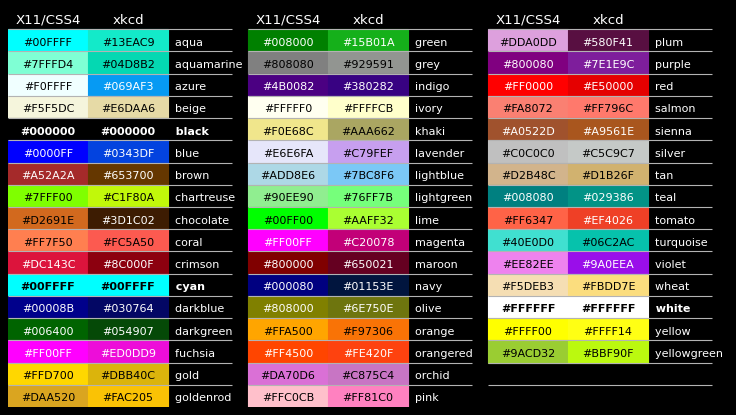

In [32]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]
    xkcd = mcolors.XKCD_COLORS[f'xkcd:{color_name}'].upper()

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = 'k' if luma[0] > 0.5 else 'w'
    xkcd_text_color = 'k' if luma[1] > 0.5 else 'w'

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(fontsize=10, weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4,
            color=css4_text_color, ha='center', **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd,
            color=xkcd_text_color, ha='center', **text_args)
    ax.text(2 + col_shift, y_pos + .7, f'  {color_name}', **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.3, 'X11/CSS4', ha='center')
    ax.text(1.5 + 3*g, -0.3, 'xkcd', ha='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()